# Classifier (AWD_LSTM)
Supervised learning, straight-forward. We try to predict sentiment by text inputs.

In [1]:
import pandas as pd
from fastai import *
from fastai.text import *

In [2]:
path = Path('/Users/jiajunkoh/projects/aa-nps')

In [3]:
data_lm = load_data(path, 'data/data_lm_export.pkl')

In [4]:
data_clas = TextClasDataBunch.from_csv(path, 'data/preproc_2019.csv', vocab=data_lm.train_ds.vocab, bs=32)

In [ ]:
data_clas.show_batch()

In [6]:
data_clas.save('data/data_clas_export.pkl')

In [7]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.2)
learn.load_encoder('awd_lstm_encoder')

In [8]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


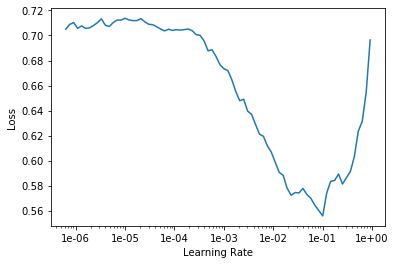

In [9]:
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(1, 1e-3, moms=(0.8, 0.7))
learn.save('awd_lstm_classifier_checkpoint_1')

epoch,train_loss,valid_loss,accuracy,time
0,0.328410,0.229200,0.913802,41:05


In [11]:
learn.freeze_to(-2) # retrain the last layer
learn.fit_one_cycle(1, slice(5e-4/2., 5e-4), moms=(0.8, 0.7))
learn.save('awd_lstm_classifier_checkpoint_2')

epoch,train_loss,valid_loss,accuracy,time
0,0.307735,0.203579,0.922902,55:28


In [12]:
learn.unfreeze() # retrain the entire network
learn.fit_one_cycle(1, slice(2e-4/100, 2e-4), moms=(0.8, 0.7))
learn.save('awd_lstm_classifier_checkpoint_3')

epoch,train_loss,valid_loss,accuracy,time
0,0.279148,0.234002,0.917452,3:07:57


In [13]:
learn.export('models/awd_lstm_classifier_model.pkl')

In [14]:
learn.predict('no delay')

(Category positive, tensor(1), tensor([0.4439, 0.5561]))

In [15]:
learn.predict('flight delay 2 hours again')

(Category negative, tensor(0), tensor([1.0000e+00, 4.5523e-09]))

In [16]:
learn.predict('web very slow')

(Category negative, tensor(0), tensor([1.0000e+00, 4.1180e-07]))

In [17]:
learn.predict('cabin crew very friendly')

(Category positive, tensor(1), tensor([0.0164, 0.9836]))

In [18]:
learn.predict('cabin crew offered chocolate to my kids')

(Category positive, tensor(1), tensor([0.3730, 0.6270]))

In [19]:
learn.predict('check in takes forever')

(Category negative, tensor(0), tensor([0.9442, 0.0558]))

In [20]:
learn.predict('proessing fee is too much for credit card')

(Category negative, tensor(0), tensor([0.8814, 0.1186]))

In [21]:
learn.predict('approve bank transfer and error if i use airasia app')

(Category negative, tensor(0), tensor([0.9662, 0.0338]))

In [22]:
learn.predict('it took me just a minute to get things done')

(Category negative, tensor(0), tensor([9.9999e-01, 7.8709e-06]))

In [23]:
learn.predict('your website has become friendlier and friendlier. Keep up the great work!')

(Category positive, tensor(1), tensor([0.3001, 0.6999]))

In [24]:
learn.predict('cebu pacific is shit and doesn\'t work you did a great job')

(Category negative, tensor(0), tensor([0.9834, 0.0166]))

In [25]:
learn.predict('price ok but flight delay')

(Category negative, tensor(0), tensor([0.8377, 0.1623]))

In [26]:
learn.predict('flight delay but price ok')

(Category negative, tensor(0), tensor([0.7403, 0.2597]))

In [33]:
learn.predict('price reasonable but food was bad')

(Category negative, tensor(0), tensor([0.8696, 0.1304]))

In [36]:
learn.predict('food was bad but price is ok')

(Category positive, tensor(1), tensor([0.3713, 0.6287]))